In [1]:
set.seed(42) # Set the seed to 42

In [2]:
# 200 random points between -10 and 10 - X is a Vector
x<- runif (200, -10, 10) 
y<-sin(x) # vector Y containing the value of sin(x). 


In [3]:
weight<- runif (10, -1, 1) # Randomize 10 initial weights 

In [4]:
set.seed(42)
# Cross-validate model with 75% training
index<-sample(1:length(x),round(0.75*length(x)),replace=FALSE) 
reg.train<-data.frame(X=x[index],Y=y[index])
reg.test<-data.frame(X=x[-index],Y=y[-index])


In [5]:
library(nnet) # Load the nnet to create your model
set.seed(42)
#3 neuron 1 hidden layer
reg.model.1 <- nnet(reg.train$X,reg.train$Y,size=3,maxit=50,Wts=weight,linout=TRUE) 
str(reg.model.1) # Look at the structure of your model.


Warning message:
"package 'nnet' was built under R version 3.6.3"

# weights:  10
initial  value 110.954499 
iter  10 value 70.129237
iter  20 value 49.540887
iter  30 value 37.185115
iter  40 value 30.634670
iter  50 value 29.927629
final  value 29.927629 
stopped after 50 iterations
List of 15
 $ n            : num [1:3] 1 3 1
 $ nunits       : int 6
 $ nconn        : num [1:7] 0 0 0 2 4 6 10
 $ conn         : num [1:10] 0 1 0 1 0 1 0 2 3 4
 $ nsunits      : num 5
 $ decay        : num 0
 $ entropy      : logi FALSE
 $ softmax      : logi FALSE
 $ censored     : logi FALSE
 $ value        : num 29.9
 $ wts          : num [1:10] -5.43 1.36 6.59 -1.32 1.64 ...
 $ convergence  : int 1
 $ fitted.values: num [1:150, 1] 0.6488 0.3885 -0.4967 -0.2392 0.0895 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ residuals    : num [1:150, 1] -0.6434 0.2638 -0.1529 -0.1613 -0.0281 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ call         : language nnet.default(x = reg.train$X, y = reg.train$Y, size = 3, Wts 

 num [1:50, 1] -1.022 -0.287 -0.833 -0.281 0.651 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


[1] 3.894301

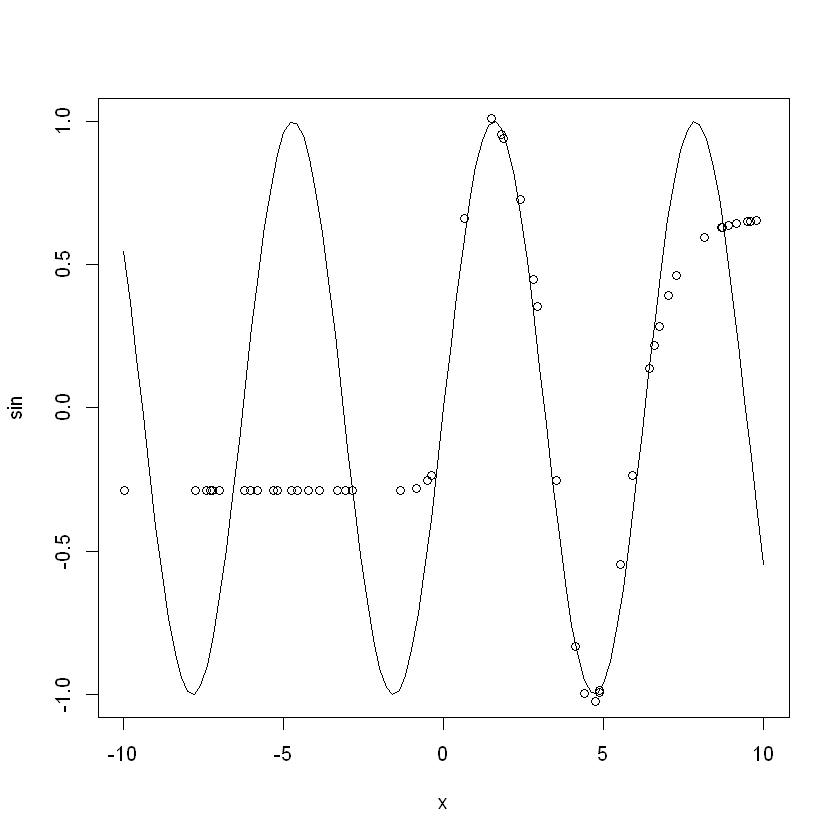

In [6]:
predict.model.1<-predict(reg.model.1,data.frame(X=reg.test$X))
str(predict.model.1)
rmse.reg<-sqrt(sum((reg.test$Y-predict.model.1)^2))
rmse.reg
plot(sin, -10, 10)
points(reg.test$X,predict.model.1)


# weights:  22
initial  value 372.098787 
iter  10 value 58.093395
iter  20 value 38.898448
iter  30 value 22.575492
iter  40 value 20.900687
iter  50 value 18.497097
final  value 18.497097 
stopped after 50 iterations
List of 15
 $ n            : num [1:3] 1 7 1
 $ nunits       : int 10
 $ nconn        : num [1:11] 0 0 0 2 4 6 8 10 12 14 ...
 $ conn         : num [1:22] 0 1 0 1 0 1 0 1 0 1 ...
 $ nsunits      : num 9
 $ decay        : num 0
 $ entropy      : logi FALSE
 $ softmax      : logi FALSE
 $ censored     : logi FALSE
 $ value        : num 18.5
 $ wts          : num [1:22] 1.266 0.853 10.438 3.841 -0.382 ...
 $ convergence  : int 1
 $ fitted.values: num [1:150, 1] 0.561 0.548 -0.692 -0.518 0.157 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ residuals    : num [1:150, 1] -0.5559 0.1043 0.0428 0.1173 -0.0955 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ call         : language nnet.default(x = reg.train$X, y = reg.train$Y

[1] 3.064144

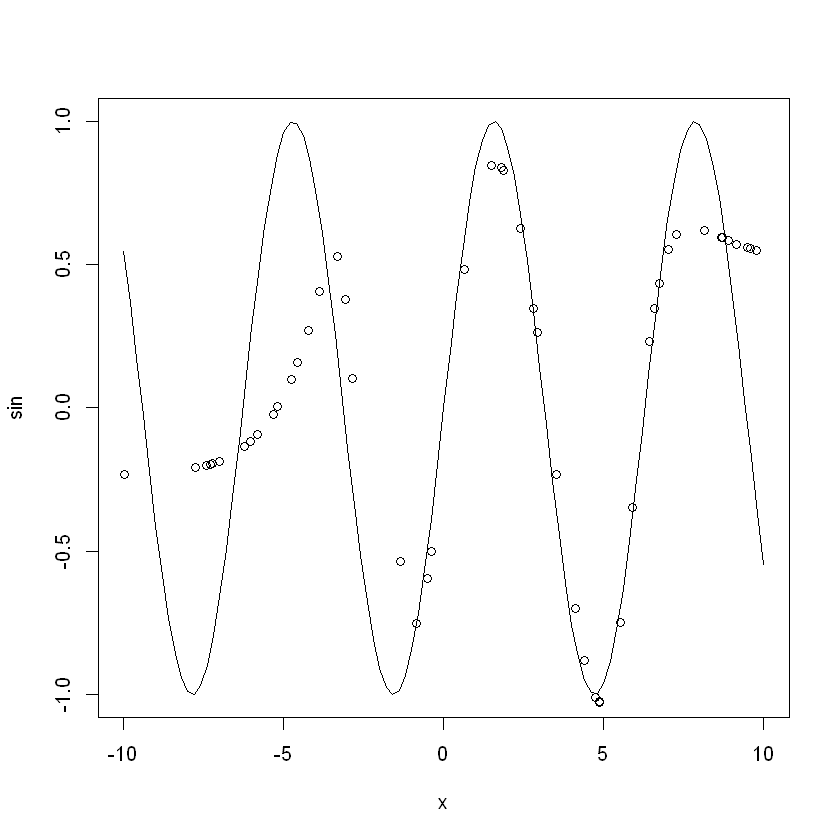

In [7]:
set.seed(42)
reg.model.2<-nnet(reg.train$X,reg.train$Y,size=7,maxit=50,Wts=runif(22, -1, 1),linout=TRUE)
str(reg.model.2)
predict.model.2<-predict(reg.model.2,data.frame(X=reg.test$X))
str(predict.model.2)
rmse.reg<-sqrt(sum((reg.test$Y-predict.model.2)^2))
rmse.reg
plot(sin, -10, 10)
points(reg.test$X, predict.model.2)
